In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
data = pd.read_csv('../Datasets/clean.csv')
data = data.drop(['Unnamed: 0', 'id', 'adult', 'imdb_id', 'overview', 'tagline'], axis=1)
data_genres_list = data.copy(deep=True)
data_genres_list.genres = data_genres_list.genres.apply(lambda x: eval(x) if pd.notna(x) else x)
data.columns

Index(['title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'budget', 'original_language', 'original_title',
       'popularity', 'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords'],
      dtype='object')

## Release Date

In [ ]:
data.release_date

## Vote Averages

### Vote Average Distribution

In [54]:
data.vote_average.min()

np.float64(0.5)

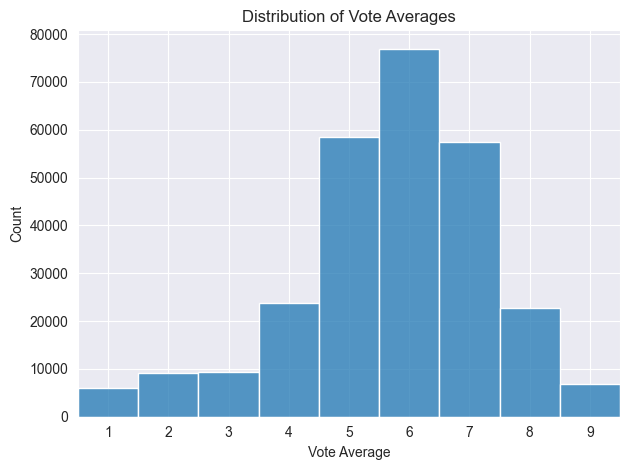

In [59]:
ax = sns.histplot(data.vote_average, bins=np.arange(0, 11)-0.5)
ax.set_xticks(range(0, 10))
ax.set_xlim(xmin=0.5, xmax=9.5)
ax.set_xlabel('Vote Average')
ax.set_title('Distribution of Vote Averages')
plt.tight_layout()
plt.show()

### by Budget

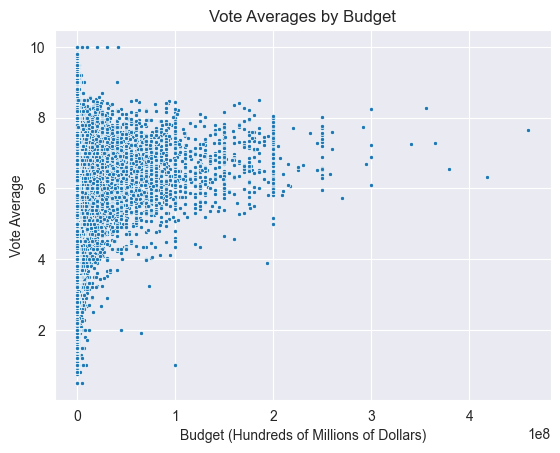

In [9]:
ax = sns.scatterplot(data, x='budget', y='vote_average', marker='.')
ax.set_title("Vote Averages by Budget")
ax.set_xlabel("Budget (Hundreds of Millions of Dollars)")
ax.set_ylabel("Vote Average")
ax.set_xticks(np.arange(0,500000000, 100000000))
plt.show()

### by Popularity

<Axes: xlabel='popularity', ylabel='vote_average'>

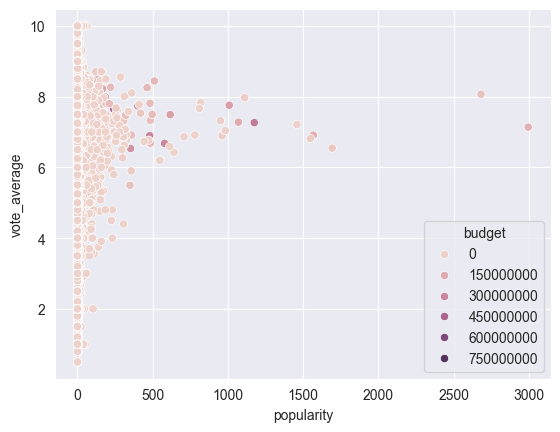

In [7]:
sns.scatterplot(data, x='popularity', y='vote_average', hue='budget')

### by Language

In [17]:
languages = data.original_language
top10_languages = languages.value_counts().head(10).index.tolist()
data_top10_languages = data[data['original_language'].isin(top10_languages)]
data_top10_languages_other = data.copy(deep=True)
data_top10_languages_other.original_language = data_top10_languages_other.original_language.apply(lambda x: x if x in top10_languages else 'other')

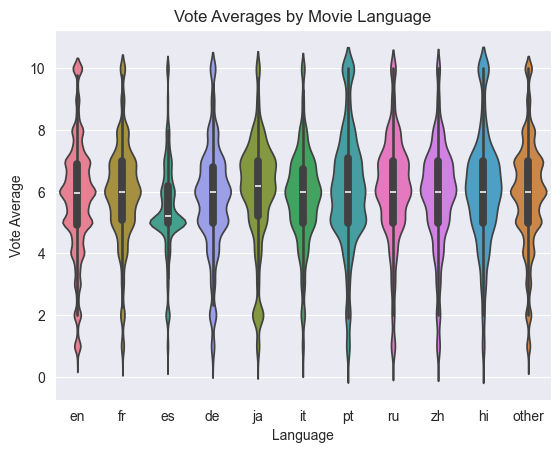

In [19]:
ax = sns.violinplot(data_top10_languages_other, x='original_language', y='vote_average', hue='original_language', order=top10_languages + ['other'])
ax.set_title("Vote Averages by Movie Language")
ax.set_xlabel("Language")
ax.set_ylabel("Vote Average")
plt.show()

### by Genre

In [95]:
data_genres_exploded = data_genres_list.explode('genres')
genres_ordered = data_genres_exploded.genres.value_counts()

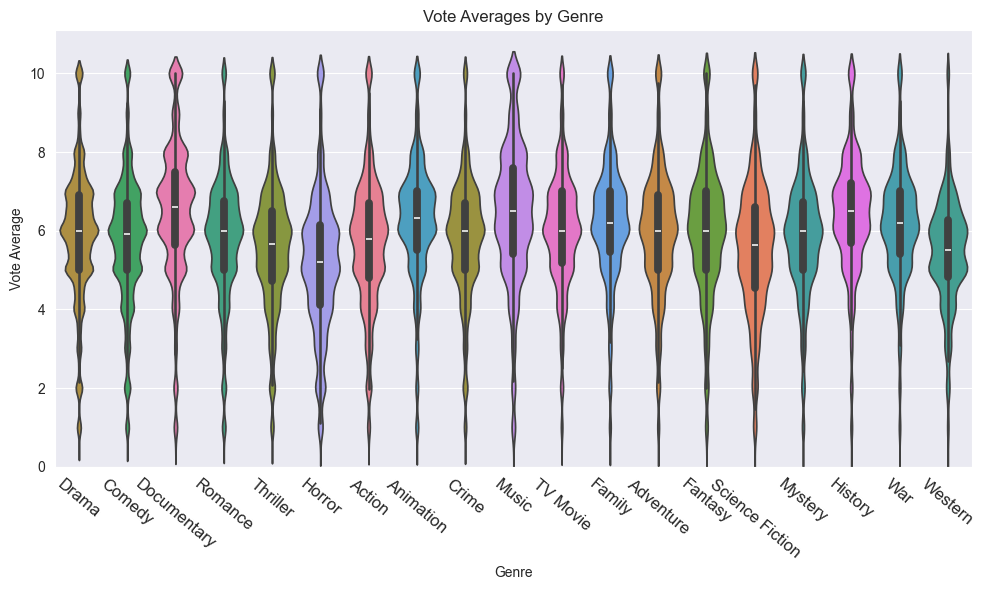

In [11]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(data_genres_exploded.reset_index(), x='genres', y='vote_average', order=genres_ordered.index, hue='genres', legend=False)
ax.set_title("Vote Averages by Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Vote Average")
ax.tick_params(axis='x', labelsize=12, rotation=75)
plt.ylim(ymin=0)
plt.tight_layout()
plt.show()


<Axes: xlabel='budget', ylabel='revenue'>

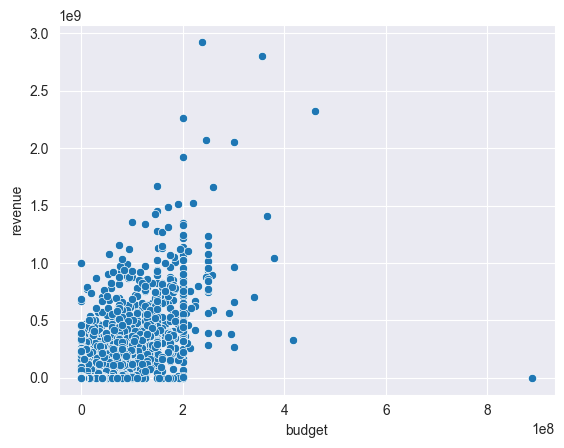

In [12]:
ax = sns.scatterplot(data, x='budget', y='revenue')

## Genre

### Genre Relations

In [118]:
data_genres_exploded.genres.unique()

array(['Action', 'Science Fiction', 'Adventure', 'Drama', 'Crime',
       'Thriller', 'Fantasy', 'Comedy', 'Romance', 'Western', 'Mystery',
       'War', 'Animation', 'Family', 'Horror', 'Music', 'History',
       'TV Movie', 'Documentary', nan], dtype=object)

In [136]:
action_movies = data.copy(deep=True)
types = action_movies.genres.apply(lambda x: type(x))
print(types)

0          <class 'list'>
1          <class 'list'>
2          <class 'list'>
3          <class 'list'>
4          <class 'list'>
               ...       
521641     <class 'list'>
521642     <class 'list'>
521643    <class 'float'>
521644    <class 'float'>
521645     <class 'list'>
Name: genres, Length: 521646, dtype: object


In [138]:
print(action_movies.iloc[521643])

title                   Manasundi Kaani
vote_average                        NaN
vote_count                            0
release_date                 2006-03-17
revenue                               0
runtime                             NaN
budget                                0
original_language                    te
original_title          Manasundi Kaani
popularity                         0.84
genres                              NaN
production_companies                NaN
production_countries                NaN
spoken_languages             ['Telugu']
keywords                            NaN
Name: 521643, dtype: object


In [140]:
list = ['1', '2']
'1' in list

True

In [195]:
action_movies = data.copy(deep=True)
action_movies['isAction'] = action_movies.genres.apply(lambda x: pd.notna(x) and 'Action' in eval(x))
action_movies = action_movies[action_movies.isAction]

In [196]:
action_movies.genres = action_movies.genres.apply(lambda x: eval(x) if pd.notna(x) else x)
action_movies = action_movies[action_movies['genres'] != 'Action']

In [198]:
action_movies

,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages,keywords,isAction
0,Inception,8.364,34495,2010-07-15,825532764,148.0,160000000,en,Inception,83.952,"[Action, Science Fiction, Adventure]","['Legendary Pictures', 'Syncopy', 'Warner Bros...","['United Kingdom', 'United States of America']","['English', 'French', 'Japanese', 'Swahili']","['rescue', 'mission', 'dream', 'airplane', 'pa...",True
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152.0,185000000,en,The Dark Knight,130.643,"[Drama, Action, Crime, Thriller]","['DC Comics', 'Legendary Pictures', 'Syncopy',...","['United Kingdom', 'United States of America']","['English', 'Mandarin']","['joker', 'sadism', 'chaos', 'secret identity'...",True
3,Avatar,7.573,29815,2009-12-15,2923706026,162.0,237000000,en,Avatar,79.932,"[Action, Adventure, Fantasy, Science Fiction]","['Dune Entertainment', 'Lightstorm Entertainme...","['United States of America', 'United Kingdom']","['English', 'Spanish']","['future', 'society', 'culture clash', 'space ...",True
4,The Avengers,7.710,29166,2012-04-25,1518815515,143.0,220000000,en,The Avengers,98.082,"[Science Fiction, Action, Adventure]",['Marvel Studios'],['United States of America'],"['English', 'Hindi', 'Russian']","['new york city', 'superhero', 'shield', 'base...",True
5,Deadpool,7.606,28894,2016-02-09,783100000,108.0,58000000,en,Deadpool,72.735,"[Action, Adventure, Comedy]","['20th Century Fox', ""The Donners' Company"", '...",['United States of America'],['English'],"['superhero', 'anti hero', 'mercenary', 'based...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521502,The 4th Beast: Mask of the Antichrist,NaN,0,2004-08-16,0,80.0,0,en,The 4th Beast: Mask of the Antichrist,0.600,[Action],['TimeCode Mechanics'],['United States of America'],NaN,NaN,True
521503,Wages of Sin,NaN,0,2007-03-05,0,95.0,0,en,Wages of Sin,0.600,[Action],['TimeCode Mechanics'],['United States of America'],NaN,NaN,True
521551,The Jekyll and Hyde Conspiracy,NaN,0,2020-05-29,0,31.0,45,en,The Jekyll and Hyde Conspiracy,0.605,"[Mystery, Crime, Action]",['15 CENTS MEDIA'],NaN,['English'],"['detective', 'attempted murder', 'secret soci...",True
521603,Love is Blind The Movie,NaN,0,2020-01-01,0,NaN,0,en,Love is Blind The Movie,0.600,"[Drama, Romance, Action]",['FloXFilms'],['United States of America'],NaN,"['romance', 'lib', 'loveisblind']",True


In [159]:
sns.barplot(action_movies_exploded.genres)

<Axes: ylabel='genres'>

Error in callback <function flush_figures at 0x000002C3078D4400> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

list

## Language

### Language Representation

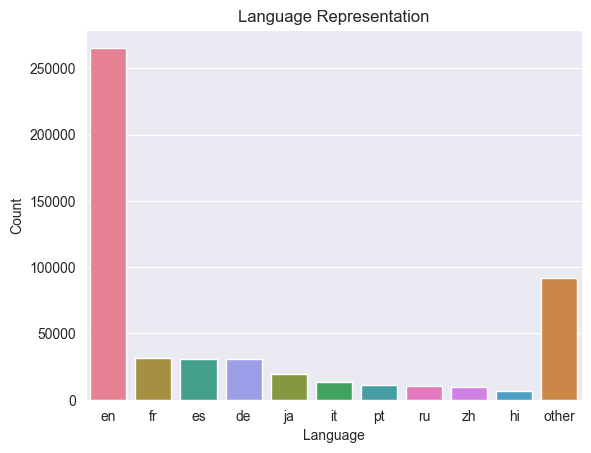

In [21]:
ax = sns.countplot(data=data_top10_languages_other, x='original_language', hue='original_language', palette='husl', order=top10_languages + ['other'])
ax.set_title("Language Representation")
ax.set_xlabel("Language")
ax.set_ylabel("Count")
plt.show()

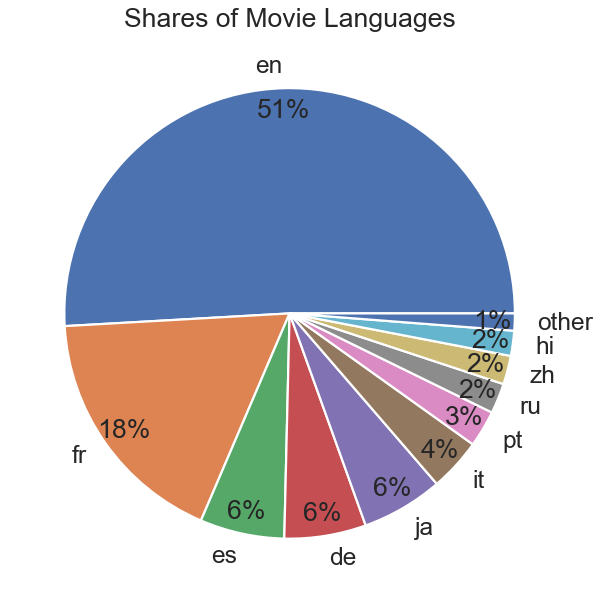

In [93]:
plt.pie(data_top10_languages_other.original_language.value_counts(), labels=top10_languages + ['other'], autopct='%1.0f%%', pctdistance=.9)
sns.set_theme("poster")
plt.title("Shares of Movie Languages")
plt.xlabel(xlabel="", fontsize=14)
plt.show()

In [72]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Pairplot